In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings  # Make sure to import the warnings module

# Ignore all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load all libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter




In [3]:
# Load the dataset
bc_prep = pd.read_csv('brca_new.csv')

In [4]:

# Display the first few rows of the dataset
bc_prep.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [5]:
# Display the column names
print(bc_prep.columns)

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')


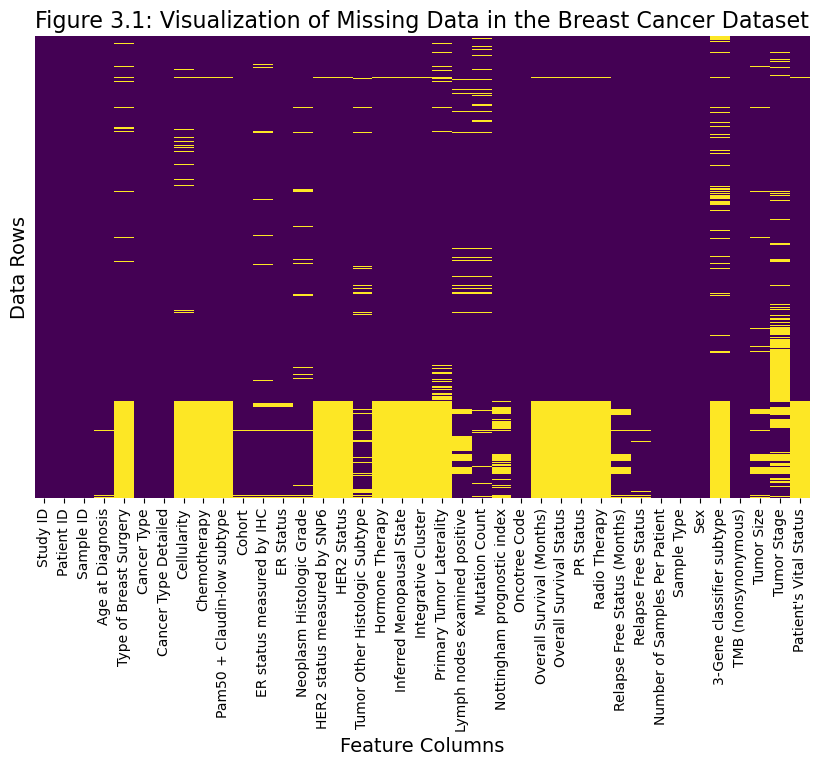

In [6]:
# Figure 1: Visualization of Missing Data in the Breast Cancer Dataset
plt.figure(figsize=(10, 6))
sns.heatmap(bc_prep.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add titles and labels
plt.title('Figure 3.1: Visualization of Missing Data in the Breast Cancer Dataset', fontsize=16)
plt.xlabel('Feature Columns', fontsize=14)
plt.ylabel('Data Rows', fontsize=14)

# Save the plot as a PNG file
plt.savefig('Figure_1_Missing_Data_Visualization.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


In [7]:
# Calculate the total number of missing values
total_missing = bc_prep.isnull().sum().sum()

# Calculate the total number of data points
total_data_points = bc_prep.size

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_data_points) * 100

print(f"Percentage of missing values: {missing_percentage:.2f}%")


Percentage of missing values: 11.17%


In [8]:

# Drop the unwanted column
bc_data = bc_prep.drop(columns=['Study ID', 'Sample ID', 
        'Cancer Type', 'Cancer Type Detailed',
       'Pam50 + Claudin-low subtype', 
       'ER status measured by IHC',
       'HER2 status measured by SNP6', 
       'Tumor Other Histologic Subtype','Integrative Cluster',
       'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 
       ])

# Display the first few rows of the modified dataset
bc_data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,Cohort,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,...,Primary Tumor Laterality,Lymph nodes examined positive,Nottingham prognostic index,Overall Survival Status,PR Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,MASTECTOMY,NaN,NO,1.0,Positive,3.0,Negative,YES,...,Right,10.0,6.044,0:LIVING,Negative,YES,0.000000,22.0,2.0,Living
1,MB-0002,43.19,BREAST CONSERVING,High,NO,1.0,Positive,3.0,Negative,YES,...,Right,0.0,4.020,0:LIVING,Positive,YES,2.615035,10.0,1.0,Living
2,MB-0005,48.87,MASTECTOMY,High,YES,1.0,Positive,2.0,Negative,YES,...,Right,1.0,4.030,1:DECEASED,Positive,NO,2.615035,15.0,2.0,Died of Disease
3,MB-0006,47.68,MASTECTOMY,Moderate,YES,1.0,Positive,2.0,Negative,YES,...,Right,3.0,4.050,0:LIVING,Positive,YES,1.307518,25.0,2.0,Living
4,MB-0008,76.97,MASTECTOMY,High,YES,1.0,Positive,3.0,Negative,YES,...,Right,8.0,6.080,1:DECEASED,Positive,YES,2.615035,40.0,2.0,Died of Disease


In [9]:
#Data information and missing values
print("Data Shape")
print(bc_data.info())
print()

Data Shape
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient ID                     2509 non-null   object 
 1   Age at Diagnosis               2498 non-null   float64
 2   Type of Breast Surgery         1955 non-null   object 
 3   Cellularity                    1917 non-null   object 
 4   Chemotherapy                   1980 non-null   object 
 5   Cohort                         2498 non-null   float64
 6   ER Status                      2469 non-null   object 
 7   Neoplasm Histologic Grade      2388 non-null   float64
 8   HER2 Status                    1980 non-null   object 
 9   Hormone Therapy                1980 non-null   object 
 10  Inferred Menopausal State      1980 non-null   object 
 11  Primary Tumor Laterality       1870 non-null   object 
 12  Lymph nodes examined positive  2243 n

In [10]:
# Check for missing values in each column
missing_values = bc_data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

# Calculate the percentage of missing data for each column
missing_percentage = bc_data.isnull().mean() * 100

# Display the percentage of missing data
print("Percentage of Missing Data in Each Column:")
print(missing_percentage)

Columns with missing values:
Age at Diagnosis                  11
Type of Breast Surgery           554
Cellularity                      592
Chemotherapy                     529
Cohort                            11
ER Status                         40
Neoplasm Histologic Grade        121
HER2 Status                      529
Hormone Therapy                  529
Inferred Menopausal State        529
Primary Tumor Laterality         639
Lymph nodes examined positive    266
Nottingham prognostic index      222
Overall Survival Status          528
PR Status                        529
Radio Therapy                    529
Tumor Size                       149
Tumor Stage                      721
Patient's Vital Status           529
dtype: int64
Percentage of Missing Data in Each Column:
Patient ID                        0.000000
Age at Diagnosis                  0.438422
Type of Breast Surgery           22.080510
Cellularity                      23.595058
Chemotherapy                     21.0840

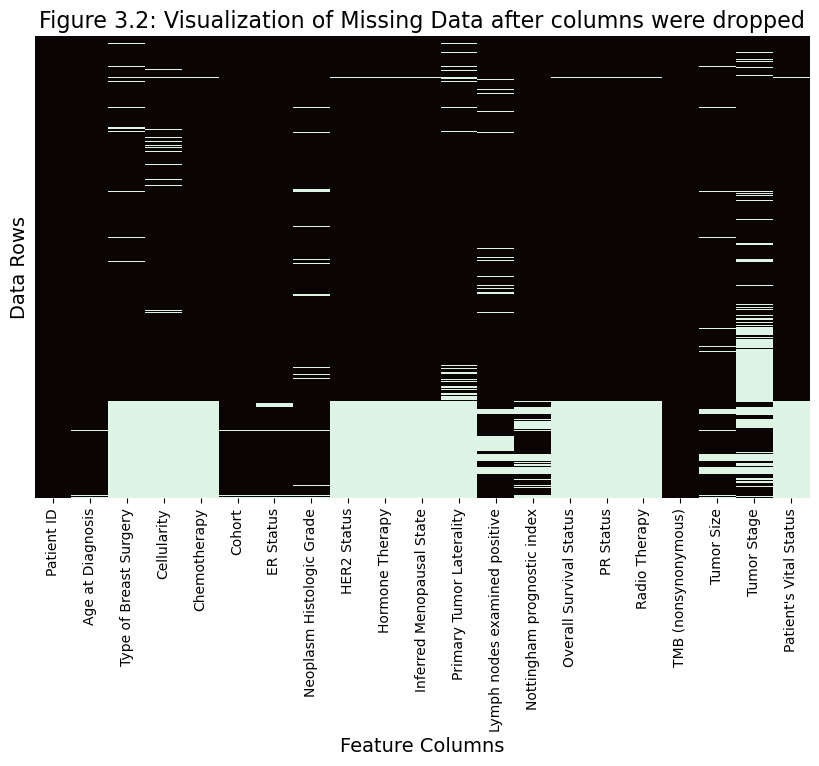

In [11]:
# Figure 1: Visualization of Missing Data in the Breast Cancer Dataset
plt.figure(figsize=(10, 6))
sns.heatmap(bc_data.isnull(), cbar=False, cmap='mako', yticklabels=False)

# Add titles and labels
plt.title('Figure 3.2: Visualization of Missing Data after columns were dropped', fontsize=16)
plt.xlabel('Feature Columns', fontsize=14)
plt.ylabel('Data Rows', fontsize=14)

# Save the plot as a PNG file
plt.savefig('Figure_2_Missing_Data_Visualization.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

In [12]:
# Calculate the total number of missing values
total_missing = bc_data.isnull().sum().sum()

# Calculate the total number of data points
total_data_points = bc_data.size

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_data_points) * 100

print(f"Percentage of missing values: {missing_percentage:.2f}%")

Percentage of missing values: 14.34%


In [13]:
# Drop rows with any missing values
df_cleaned = bc_data.dropna()

# Display the number of rows before and after dropping
print("Number of rows before dropping missing values:", len(bc_data))
print("Number of rows after dropping missing values:", len(df_cleaned))

# Display the cleaned DataFrame
print(df_cleaned.head())

Number of rows before dropping missing values: 2509
Number of rows after dropping missing values: 1283
  Patient ID  Age at Diagnosis Type of Breast Surgery Cellularity  \
1    MB-0002             43.19      BREAST CONSERVING        High   
2    MB-0005             48.87             MASTECTOMY        High   
3    MB-0006             47.68             MASTECTOMY    Moderate   
4    MB-0008             76.97             MASTECTOMY        High   
5    MB-0010             78.77             MASTECTOMY    Moderate   

  Chemotherapy  Cohort ER Status  Neoplasm Histologic Grade HER2 Status  \
1           NO     1.0  Positive                        3.0    Negative   
2          YES     1.0  Positive                        2.0    Negative   
3          YES     1.0  Positive                        2.0    Negative   
4          YES     1.0  Positive                        3.0    Negative   
5           NO     1.0  Positive                        3.0    Negative   

  Hormone Therapy  ... Primary 

In [14]:
# Check for duplicates in the 'Patient.ID' column
duplicates = df_cleaned[df_cleaned.duplicated(subset='Patient ID', keep=False)]

# Display the duplicates
print("Duplicate entries in 'Patient ID':")
print(duplicates)

Duplicate entries in 'Patient ID':
Empty DataFrame
Columns: [Patient ID, Age at Diagnosis, Type of Breast Surgery, Cellularity, Chemotherapy, Cohort, ER Status, Neoplasm Histologic Grade, HER2 Status, Hormone Therapy, Inferred Menopausal State, Primary Tumor Laterality, Lymph nodes examined positive, Nottingham prognostic index, Overall Survival Status, PR Status, Radio Therapy, TMB (nonsynonymous), Tumor Size, Tumor Stage, Patient's Vital Status]
Index: []

[0 rows x 21 columns]


In [15]:
# Remove "Died of Other Causes" from the dataset in the 'Patient.s.Vital.Status' column
df_cleaned = df_cleaned[df_cleaned["Patient's Vital Status"] != "Died of Other Causes"]

# Display the updated DataFrame
print(df_cleaned.head())

  Patient ID  Age at Diagnosis Type of Breast Surgery Cellularity  \
1    MB-0002             43.19      BREAST CONSERVING        High   
2    MB-0005             48.87             MASTECTOMY        High   
3    MB-0006             47.68             MASTECTOMY    Moderate   
4    MB-0008             76.97             MASTECTOMY        High   
5    MB-0010             78.77             MASTECTOMY    Moderate   

  Chemotherapy  Cohort ER Status  Neoplasm Histologic Grade HER2 Status  \
1           NO     1.0  Positive                        3.0    Negative   
2          YES     1.0  Positive                        2.0    Negative   
3          YES     1.0  Positive                        2.0    Negative   
4          YES     1.0  Positive                        3.0    Negative   
5           NO     1.0  Positive                        3.0    Negative   

  Hormone Therapy  ... Primary Tumor Laterality Lymph nodes examined positive  \
1             YES  ...                    Right      

In [16]:
# Check values for each column
for column in df_cleaned.columns:
    print(f"Values in column '{column}':")
    if df_cleaned[column].dtype == 'object' or df_cleaned[column].dtype.name == 'category':
        print(df_cleaned[column].value_counts())
    else:
        print(df_cleaned[column].describe())
    print("\n")

Values in column 'Patient ID':
Patient ID
MB-0002    1
MB-4764    1
MB-4732    1
MB-4733    1
MB-4735    1
          ..
MB-0656    1
MB-0658    1
MB-0660    1
MB-0661    1
MB-6346    1
Name: count, Length: 1000, dtype: int64


Values in column 'Age at Diagnosis':
count    1000.000000
mean       57.817460
std        12.574629
min        21.930000
25%        48.590000
50%        57.900000
75%        67.120000
max        96.290000
Name: Age at Diagnosis, dtype: float64


Values in column 'Type of Breast Surgery':
Type of Breast Surgery
MASTECTOMY           555
BREAST CONSERVING    445
Name: count, dtype: int64


Values in column 'Cellularity':
Cellularity
High        498
Moderate    390
Low         112
Name: count, dtype: int64


Values in column 'Chemotherapy':
Chemotherapy
NO     728
YES    272
Name: count, dtype: int64


Values in column 'Cohort':
count    1000.000000
mean        2.122000
std         0.967498
min         1.000000
25%         1.000000
50%         2.000000
75%         3.

In [17]:
import pandas as pd

# make duplicate dataset
df_clean = df_cleaned.copy()

# Convert specified columns to numeric values with fillna for unmapped values
df_clean['ER Status'] = df_clean['ER Status'].map({'Positive': 0, 'Negative': 1}).fillna(-1)
df_clean['HER2 Status'] = df_clean['HER2 Status'].map({'Negative': 0, 'Positive': 1}).fillna(-1)
df_clean['PR Status'] = df_clean['PR Status'].map({'Positive': 0, 'Negative': 1}).fillna(-1)
df_clean['Inferred Menopausal State'] = df_clean['Inferred Menopausal State'].map({'Pre': 0, 'Post': 1}).fillna(-1)
df_clean['Chemotherapy'] = df_clean['Chemotherapy'].map({'NO': 0, 'YES': 1}).fillna(-1)
df_clean['Cellularity'] = df_clean['Cellularity'].map({'High': 0, 'Moderate': 1, 'Low': 2}).fillna(-1)
df_clean['Primary Tumor Laterality'] = df_clean['Primary Tumor Laterality'].map({'Right': 0, 'Left': 1}).fillna(-1)
df_clean['Radio Therapy'] = df_clean['Radio Therapy'].map({'NO': 0, 'YES': 1}).fillna(-1)
df_clean['Type of Breast Surgery'] = df_clean['Type of Breast Surgery'].map({'BREAST CONSERVING': 0, 'MASTECTOMY': 1}).fillna(-1)
df_clean['Hormone Therapy'] = df_clean['Hormone Therapy'].map({'YES': 0, 'NO': 1}).fillna(-1)

# Convert 'Overall Survival Status' to categorical with labels
df_clean['Overall Survival Status'] = pd.Categorical(df_clean['Overall Survival Status'], 
                                                     categories=['0:LIVING', '1:DECEASED'], 
                                                     ordered=False).rename_categories(['Living', 'Deceased'])

# Display the transformed DataFrame
print(df_clean)

     Patient ID  Age at Diagnosis  Type of Breast Surgery  Cellularity  \
1       MB-0002             43.19                       0            0   
2       MB-0005             48.87                       1            0   
3       MB-0006             47.68                       1            1   
4       MB-0008             76.97                       1            0   
5       MB-0010             78.77                       1            1   
...         ...               ...                     ...          ...   
1694    MB-6229             75.33                       1            0   
1698    MB-6233             70.65                       0            0   
1702    MB-6239             52.84                       0            0   
1707    MB-6251             48.59                       1            0   
1743    MB-6346             63.20                       0            0   

      Chemotherapy  Cohort  ER Status  Neoplasm Histologic Grade  HER2 Status  \
1                0     1.0    

In [18]:
df_clean.describe()

,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,Cohort,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Lymph nodes examined positive,Nottingham prognostic index,PR Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,57.817460,0.555000,0.614000,0.272000,2.122000,0.253000,2.469000,0.13900,0.401000,0.716000,0.505000,2.046000,4.176647,0.491000,0.704000,6.740254,25.82350,1.771000
std,12.574629,0.497214,0.679312,0.445213,0.967498,0.434948,0.632011,0.34612,0.490346,0.451162,0.500225,3.998984,1.076721,0.500169,0.456719,4.537863,15.26834,0.634793
min,21.930000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.002000,0.000000,0.000000,0.000000,1.00000,1.000000
25%,48.590000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.053500,0.000000,0.000000,3.922553,17.00000,1.000000
50%,57.900000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,4.046000,0.000000,1.000000,6.537589,22.00000,2.000000
75%,67.120000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,0.00000,1.000000,1.000000,1.000000,2.000000,5.050000,1.000000,1.000000,9.152624,30.00000,2.000000
max,96.290000,1.000000,2.000000,1.000000,5.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,31.000000,6.360000,1.000000,1.000000,39.225531,180.00000,4.000000


In [19]:
# Do summary for only original numerical columns
# Drop the specified columns
bc_clean = df_clean.drop(columns=['Patient ID', "Patient's Vital Status"])

# Display the updated DataFrame
print(bc_clean)

      Age at Diagnosis  Type of Breast Surgery  Cellularity  Chemotherapy  \
1                43.19                       0            0             0   
2                48.87                       1            0             1   
3                47.68                       1            1             1   
4                76.97                       1            0             1   
5                78.77                       1            1             0   
...                ...                     ...          ...           ...   
1694             75.33                       1            0             0   
1698             70.65                       0            0             0   
1702             52.84                       0            0             1   
1707             48.59                       1            0             1   
1743             63.20                       0            0             0   

      Cohort  ER Status  Neoplasm Histologic Grade  HER2 Status  \
1       

In [20]:
# Check the data types of the DataFrame
print(bc_clean.dtypes)

Age at Diagnosis                  float64
Type of Breast Surgery              int64
Cellularity                         int64
Chemotherapy                        int64
Cohort                            float64
ER Status                           int64
Neoplasm Histologic Grade         float64
HER2 Status                         int64
Hormone Therapy                     int64
Inferred Menopausal State           int64
Primary Tumor Laterality            int64
Lymph nodes examined positive     float64
Nottingham prognostic index       float64
Overall Survival Status          category
PR Status                           int64
Radio Therapy                       int64
TMB (nonsynonymous)               float64
Tumor Size                        float64
Tumor Stage                       float64
dtype: object


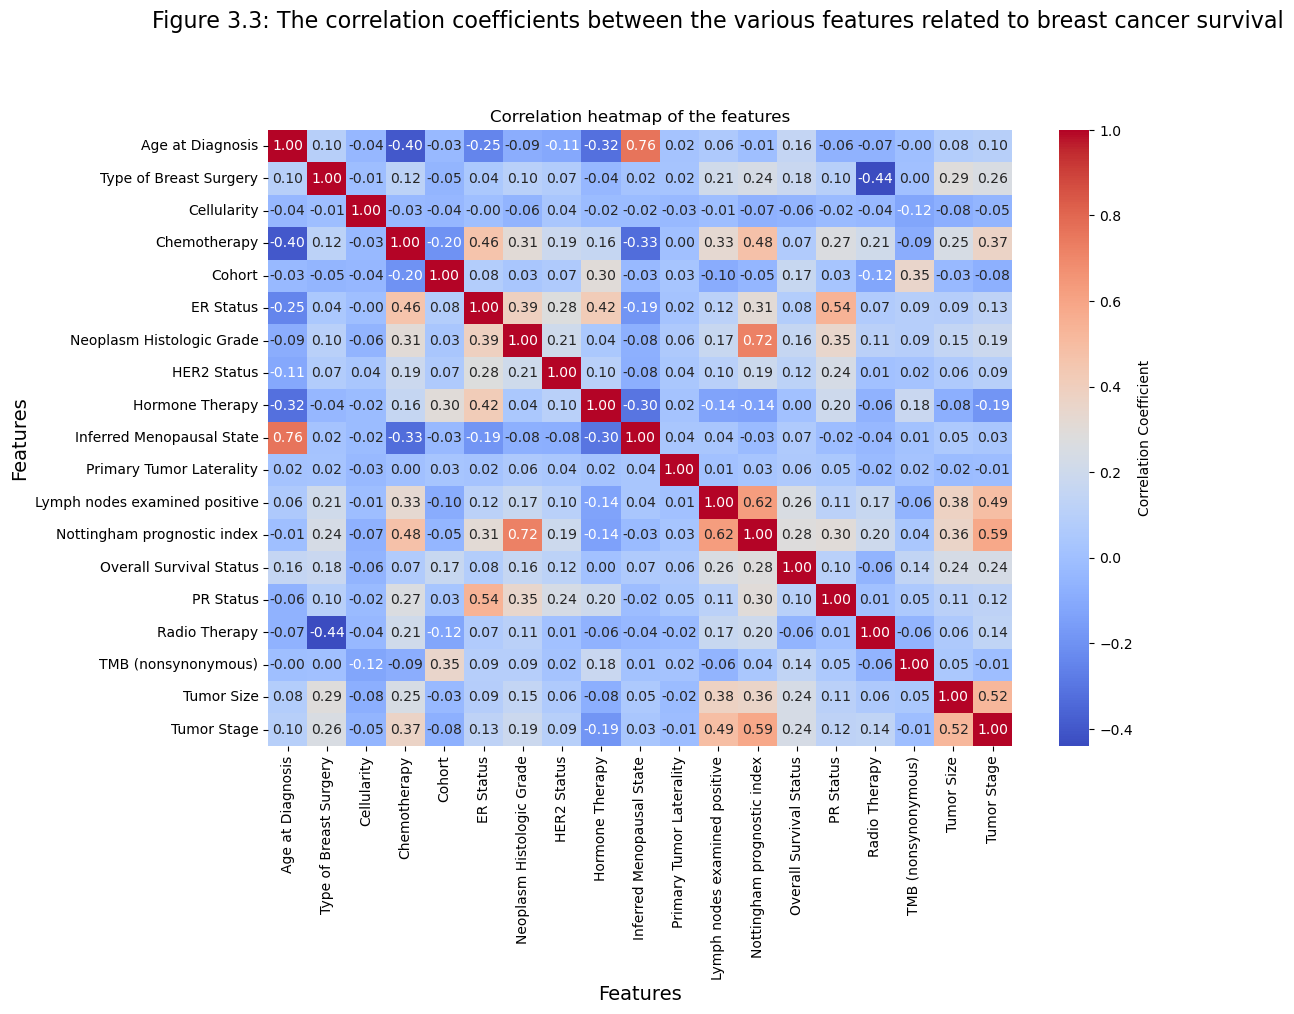

In [21]:
bc_clean_corr = bc_clean.copy()

bc_clean_corr['Overall Survival Status'] = bc_clean_corr['Overall Survival Status'].cat.codes

# Calculate the correlation matrix
correlation_matrix = bc_clean_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'})

# Add titles and labels
plt.suptitle('Figure 3.3: The correlation coefficients between the various features related to breast cancer survival', fontsize=16, y=1.03)
plt.title('Correlation heatmap of the features', fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Save the plot as a PNG file
plt.savefig("corrn_plot.png", format='png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

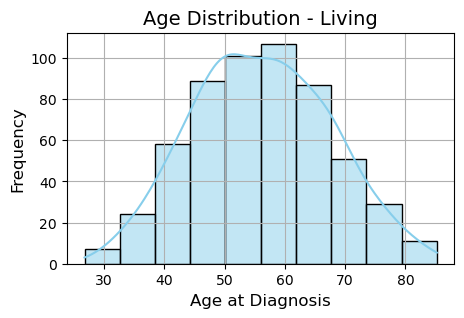

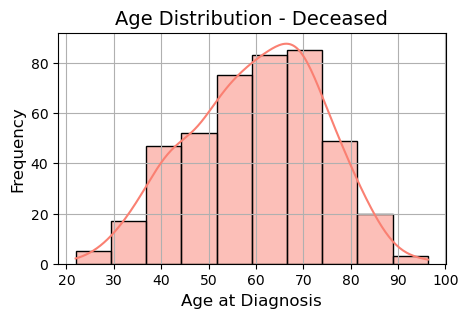

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot for Living
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Living']['Age at Diagnosis'], 
             bins=10, color='skyblue', kde=True)
plt.title('Age Distribution - Living', fontsize=14)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
# Save the plot as a PNG file
plt.savefig("age_survival.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# Plot for Deceased
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Deceased']['Age at Diagnosis'], 
             bins=10, color='salmon', kde=True)
plt.title('Age Distribution - Deceased', fontsize=14)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
# Save the plot as a PNG file
plt.savefig("age_deceased.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

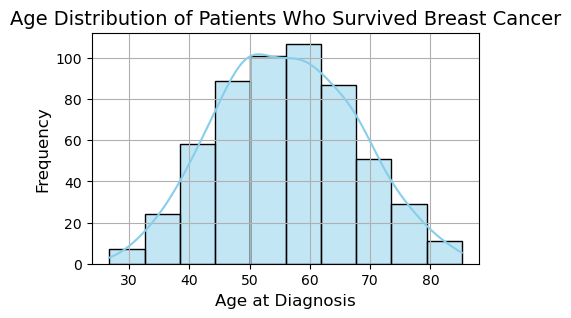

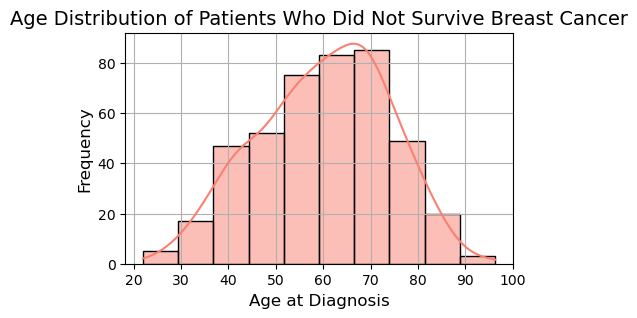

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Living
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Living']['Age at Diagnosis'], 
             bins=10, color='skyblue', kde=True)
plt.title('Age Distribution of Patients Who Survived Breast Cancer', fontsize=14)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
# Save the plot as a PNG file
plt.savefig("age_survival.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# Plot for Deceased
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Deceased']['Age at Diagnosis'], 
             bins=10, color='salmon', kde=True)
plt.title('Age Distribution of Patients Who Did Not Survive Breast Cancer', fontsize=14)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
# Save the plot as a PNG file
plt.savefig("age_deceased.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


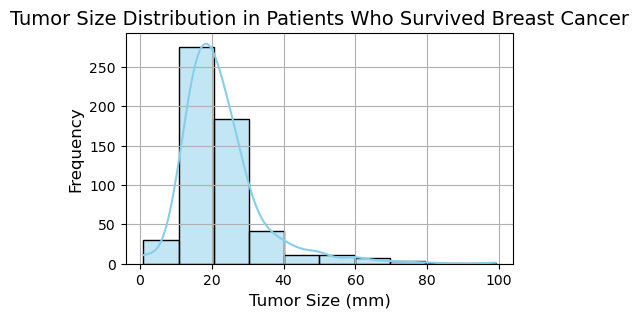

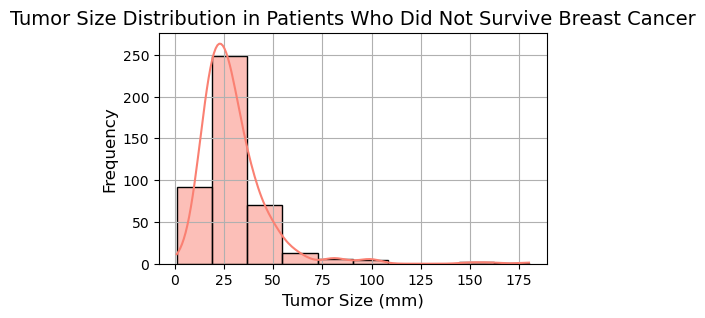

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot for Living
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Living']['Tumor Size'], 
             bins=10, color='skyblue', kde=True)
plt.title('Tumor Size Distribution in Patients Who Survived Breast Cancer', fontsize=14)
plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot for Deceased
plt.figure(figsize=(5, 3))
sns.histplot(bc_clean[bc_clean['Overall Survival Status'] == 'Deceased']['Tumor Size'], 
             bins=10, color='salmon', kde=True)
plt.title('Tumor Size Distribution in Patients Who Did Not Survive Breast Cancer', fontsize=14)
plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


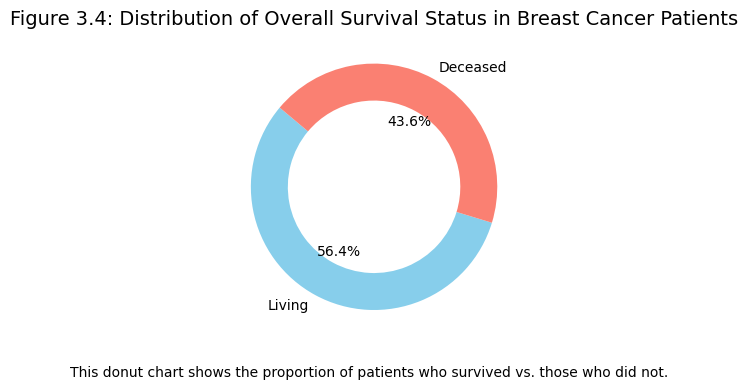

In [25]:
# Donut Chart for Overall Survival Status
status_counts = bc_clean['Overall Survival Status'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3), colors=['skyblue', 'salmon'])

plt.title('Figure 3.4: Distribution of Overall Survival Status in Breast Cancer Patients', fontsize=14)

# Adding a small figure legend below the title
plt.figtext(0.5, 0.02, 'This donut chart shows the proportion of patients who survived vs. those who did not.', 
            ha="center", fontsize=10, wrap=True)

plt.savefig("sur_donut.png", format='png', dpi=300, bbox_inches='tight')
plt.show()



/var/folders/mc/q4t1b14n03g5lbp4p2hp4ggm0000gn/T/ipykernel_4009/2536598293.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surgery_counts = bc_clean.groupby(['Type of Breast Surgery', 'Overall Survival Status']).size().unstack()


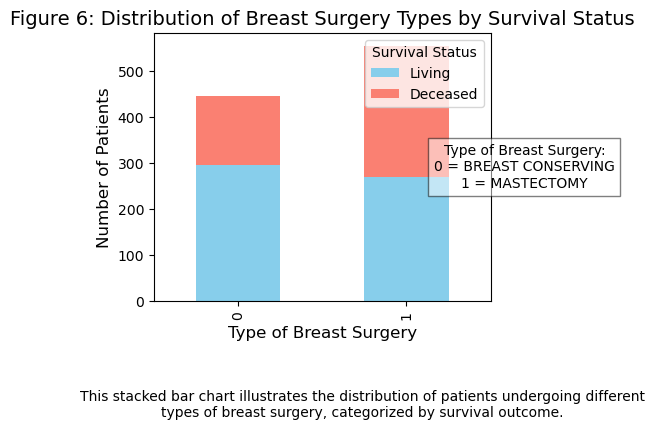

In [26]:
# Dictionary to map surgery types
surgery_mapping = {0: 'BREAST CONSERVING', 1: 'MASTECTOMY'}

# Stacked Bar Chart for Type of Breast Surgery by Survival Status
surgery_counts = bc_clean.groupby(['Type of Breast Surgery', 'Overall Survival Status']).size().unstack()

surgery_counts.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue', 'salmon'])

plt.title('Figure 6: Distribution of Breast Surgery Types by Survival Status', fontsize=14)
plt.xlabel('Type of Breast Surgery', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add a legend for the survival status
plt.legend(title='Survival Status', loc='upper right')

# Add a custom legend for the type of breast surgery
plt.text(1.1, 0.5, 'Type of Breast Surgery:\n0 = BREAST CONSERVING\n1 = MASTECTOMY',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Adjusting the figure to prevent overlapping text
plt.tight_layout(pad=2.5)

# Adding a small figure legend below the title
plt.figtext(0.5, -0.1, 'This stacked bar chart illustrates the distribution of patients undergoing different types of breast surgery, categorized by survival outcome.', 
            ha="center", fontsize=10, wrap=True)

plt.show()




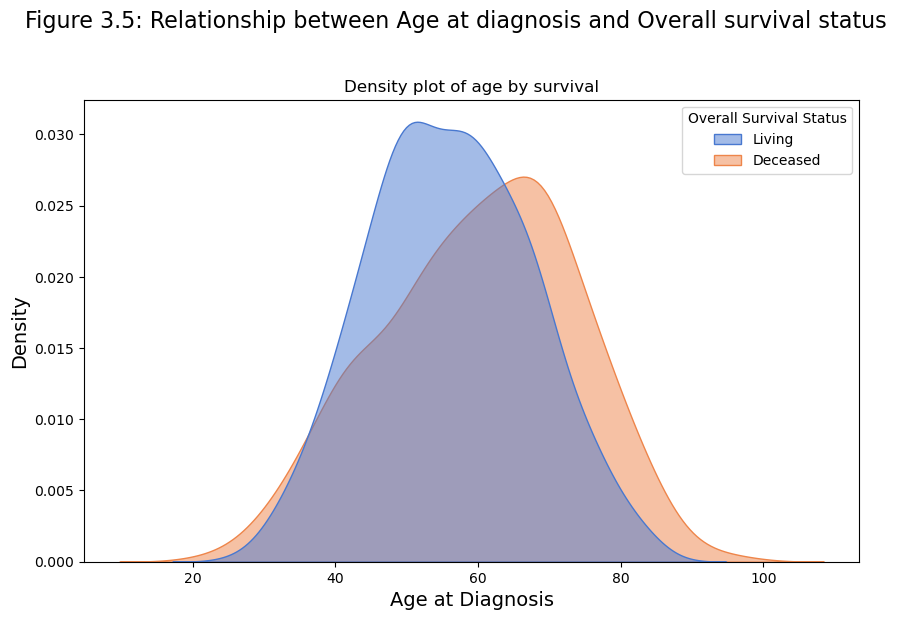

In [27]:
# Density Plot for Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=bc_clean, x='Age at Diagnosis', hue='Overall Survival Status', fill=True, common_norm=False, palette='muted', alpha=0.5)

# Add titles and labels
plt.suptitle('Figure 3.5: Relationship between Age at diagnosis and Overall survival status ', fontsize=16, y=1.03)
plt.title('Density plot of age by survival', fontsize=12)
plt.xlabel('Age at Diagnosis', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Save the plot as a PNG file
plt.savefig("Figure_3.5_Age_Distribution_by_Survival_Status.png", format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


/var/folders/mc/q4t1b14n03g5lbp4p2hp4ggm0000gn/T/ipykernel_4009/2433245676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=bc_clean, palette='pastel')


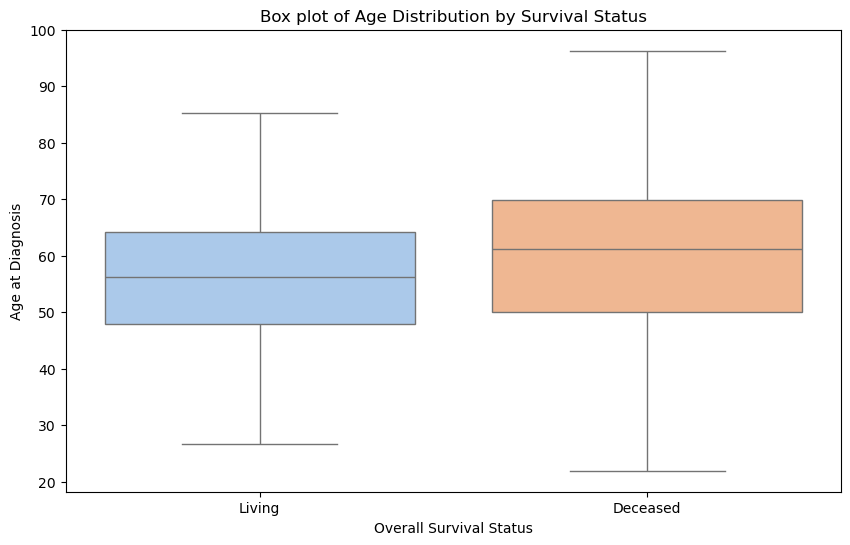

In [28]:
# Box Plot for Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=bc_clean, palette='pastel')
plt.title('Box plot of Age Distribution by Survival Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Age at Diagnosis')
# Save the plot as a PNG file
plt.savefig("Figure_3.5_Age_Dist_by_Surv_Status.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

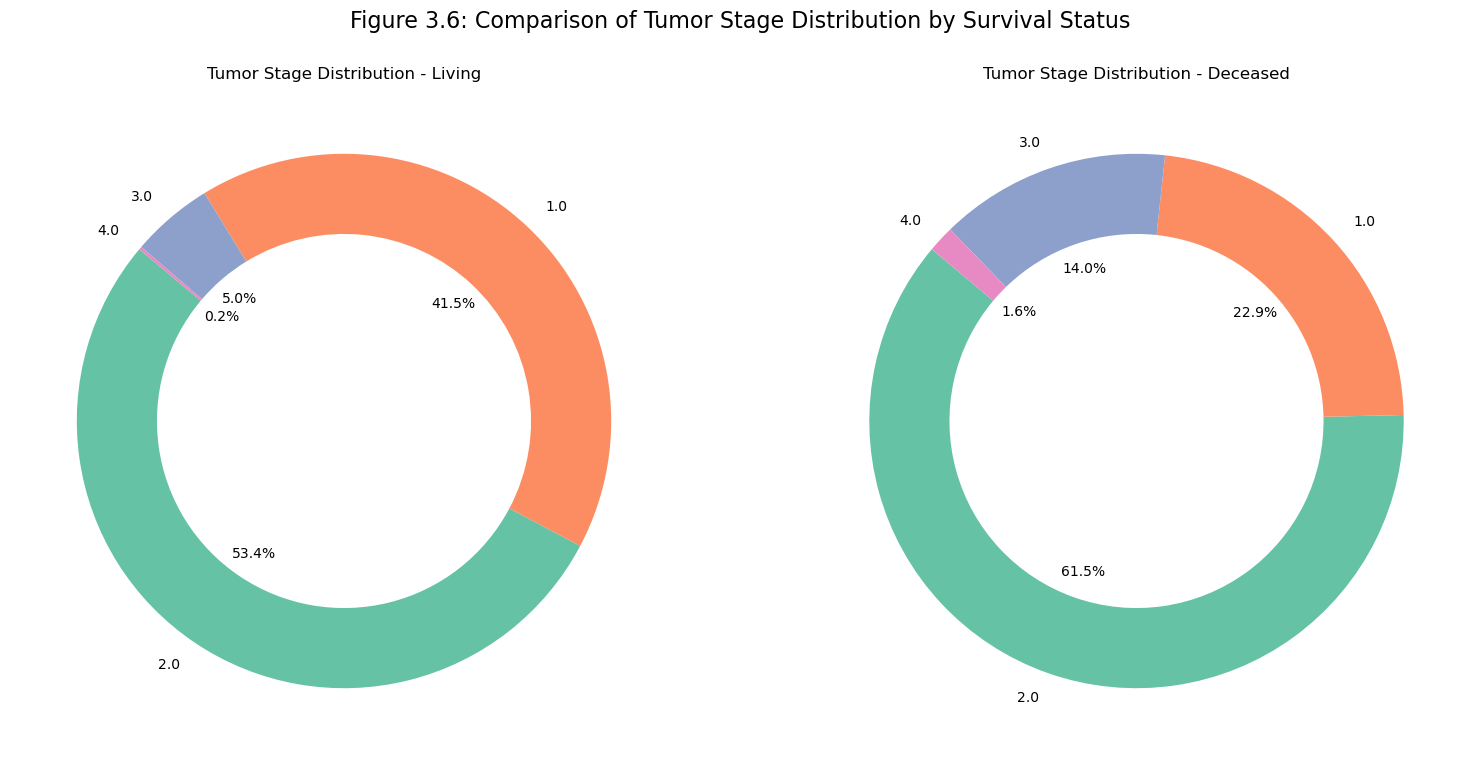

In [29]:
# Separate data for Living and Deceased
living_data = bc_clean[bc_clean['Overall Survival Status'] == 'Living']
deceased_data = bc_clean[bc_clean['Overall Survival Status'] == 'Deceased']

# Define the plot settings in a function to avoid redundancy
def plot_pie_chart(data, title, ax):
    status_counts = data['Tumor Stage'].value_counts()
    ax.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, 
           wedgeprops=dict(width=0.3), colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
    ax.set_title(title)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
plot_pie_chart(living_data, 'Tumor Stage Distribution - Living', axs[0])
plot_pie_chart(deceased_data, 'Tumor Stage Distribution - Deceased', axs[1])

# Set a main title for the figure
fig.suptitle('Figure 3.6: Comparison of Tumor Stage Distribution by Survival Status', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as a PNG file
plt.savefig("tumorSiz_plot.png", format='png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()


/var/folders/mc/q4t1b14n03g5lbp4p2hp4ggm0000gn/T/ipykernel_4009/1187447440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bc_clean, x='Tumor Stage', palette='viridis')


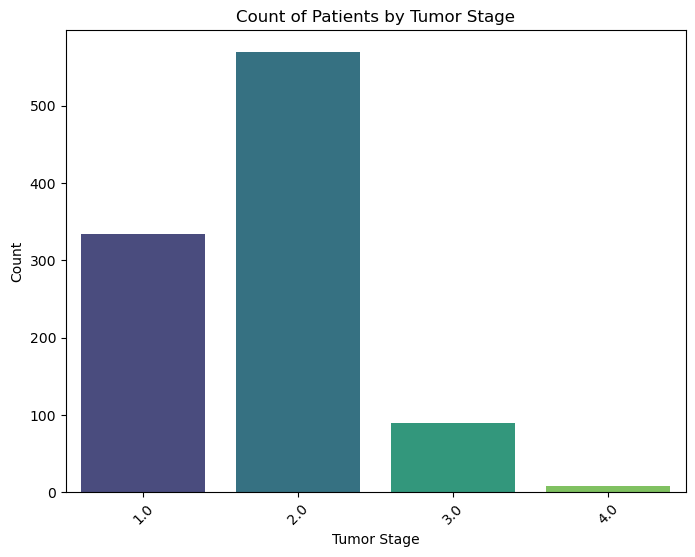

In [30]:

# Assuming 'bc_clean' is your DataFrame and 'Tumor Stage' is a categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(data=bc_clean, x='Tumor Stage', palette='viridis')
plt.title('Count of Patients by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

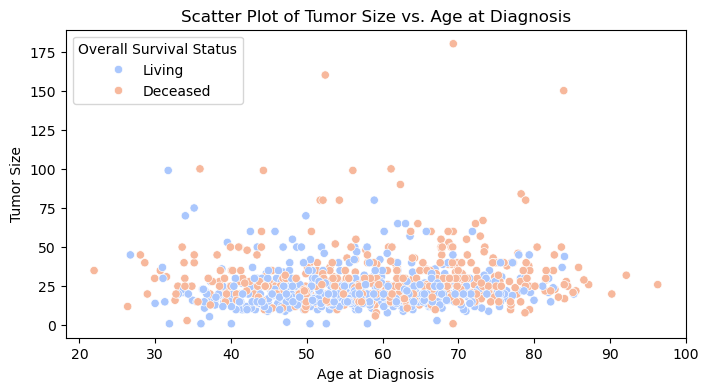

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bc_clean' is your DataFrame
plt.figure(figsize=(8, 4))
sns.scatterplot(data=bc_clean, x='Age at Diagnosis', y='Tumor Size', hue='Overall Survival Status', palette='coolwarm')
plt.title('Scatter Plot of Tumor Size vs. Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Tumor Size')
plt.legend(title='Overall Survival Status')
plt.show()


/var/folders/mc/q4t1b14n03g5lbp4p2hp4ggm0000gn/T/ipykernel_4009/6905201.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surgery_counts = bc_clean.groupby(['Type of Breast Surgery', 'Overall Survival Status']).size().unstack()


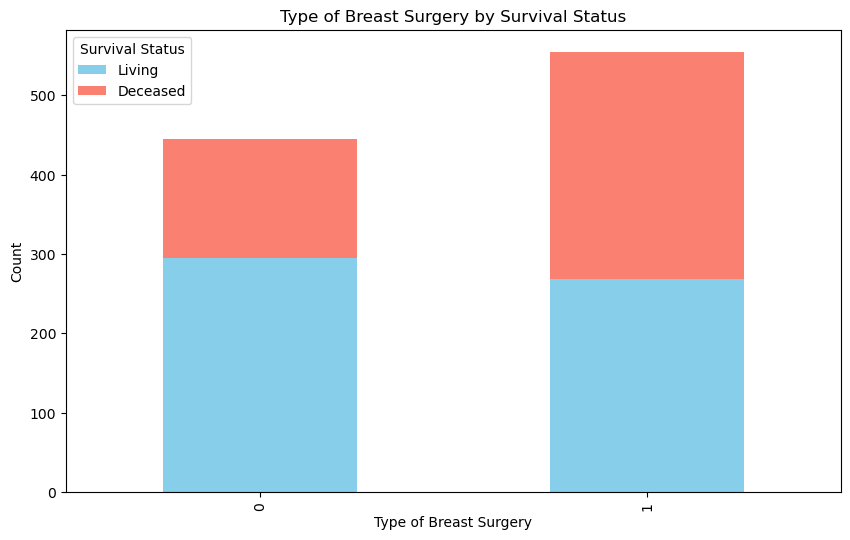

In [32]:

# Stacked Bar Chart for Type of Breast Surgery
surgery_counts = bc_clean.groupby(['Type of Breast Surgery', 'Overall Survival Status']).size().unstack()
surgery_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Type of Breast Surgery by Survival Status')
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()



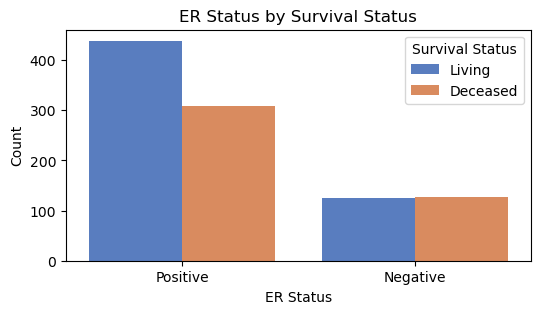

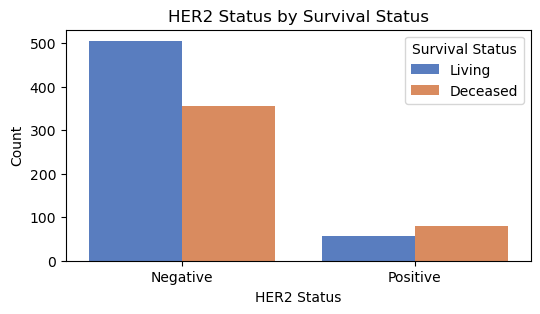

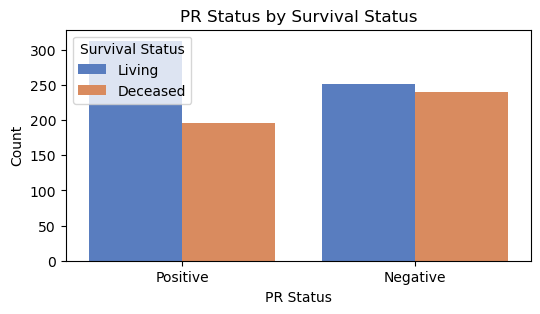

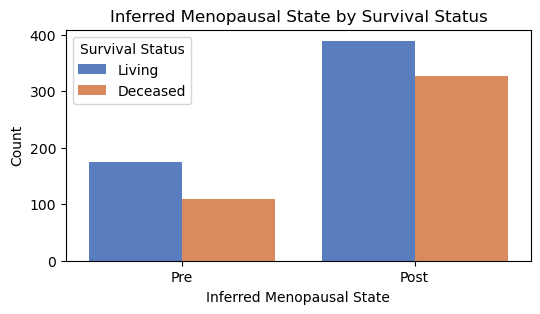

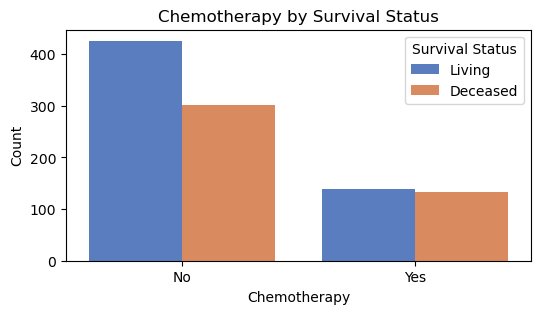

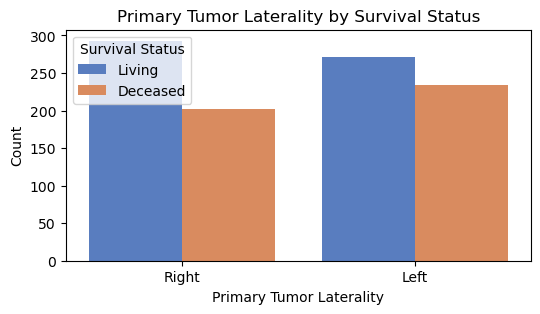

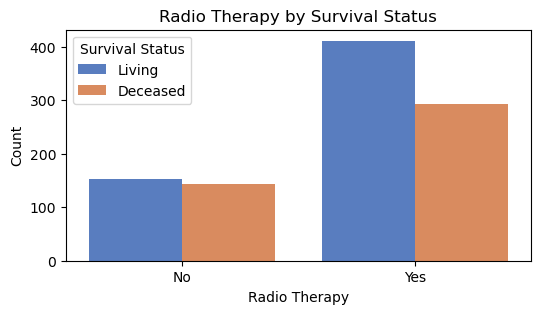

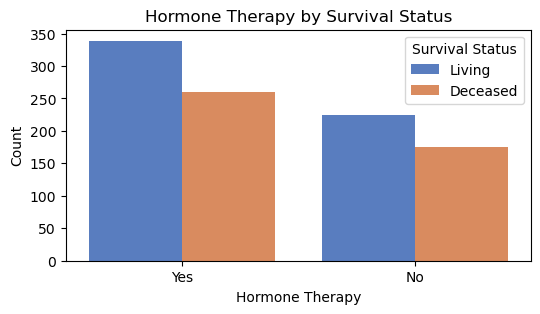

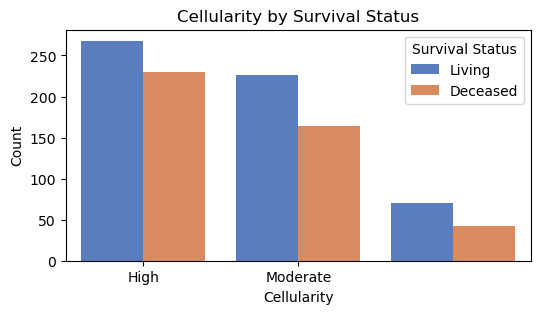

In [33]:
# Define meanings for 0 and 1
meanings = {
    'ER Status': {0: 'Positive', 1: 'Negative'},
    'HER2 Status': {0: 'Negative', 1: 'Positive'},
    'PR Status': {0: 'Positive', 1: 'Negative'},
    'Inferred Menopausal State': {0: 'Pre', 1: 'Post'},
    'Chemotherapy': {0: 'No', 1: 'Yes'},
    'Primary Tumor Laterality': {0: 'Right', 1: 'Left'},
    'Radio Therapy': {0: 'No', 1: 'Yes'},
    'Hormone Therapy': {0: 'Yes', 1: 'No'},
    'Cellularity': {0: 'High', 1: 'Moderate', 2: 'Low'}
}

# Separate data for Living and Deceased
living_data = bc_clean[bc_clean['Overall Survival Status'] == 'Living']
deceased_data = bc_clean[bc_clean['Overall Survival Status'] == 'Deceased']

# Stacked Bar Charts for Categorical Variables
for var in meanings.keys():
    plt.figure(figsize=(6, 3))
    sns.countplot(x=var, hue='Overall Survival Status', data=bc_clean, palette='muted')
    plt.title(f'{var} by Survival Status')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=[meanings[var][0], meanings[var][1]])
    plt.legend(title='Survival Status')
    plt.show()

Machine Learning

In [35]:
# Prepare the data
X = bc_clean.drop(columns=['Overall Survival Status'])
y = bc_clean['Overall Survival Status'].apply(lambda x: 1 if x == 'Deceased' else 0)

In [36]:

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [37]:
# Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Class Distribution:
 Overall Survival Status
0    451
1    349
Name: count, dtype: int64


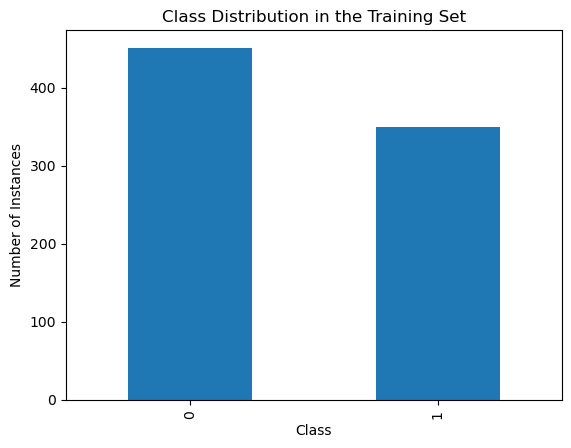

In [39]:
# checking class imbalance
class_distribution = y_train.value_counts()

# Print the class distribution
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in the Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

In [40]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'bc_clean' is your DataFrame
X = bc_clean.drop(columns=['Overall Survival Status'])
y = bc_clean['Overall Survival Status'].apply(lambda x: 1 if x == 'Deceased' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print original class distribution
print('Original training set shape', Counter(y_train))
print('Original test set shape', Counter(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE on the training data
print('Resampled training set shape', Counter(y_smote))

# At this point, you would train your model on X_train_smote, y_train_smote
# and evaluate it on X_test, y_test



Original training set shape Counter({0: 451, 1: 349})
Original test set shape Counter({0: 113, 1: 87})
Resampled training set shape Counter({0: 451, 1: 451})


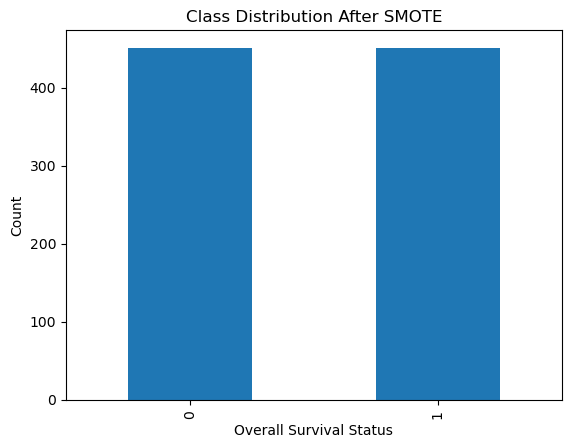

In [41]:
# Plot the class distribution after SMOTE
class_counts_smote_oversampler = pd.Series(y_smote).value_counts()
class_counts_smote_oversampler.plot(kind='bar')
plt.xlabel("Overall Survival Status")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Proceed with model training
# Example with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6906077348066298
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        89
           1       0.71      0.65      0.68        92

    accuracy                           0.69       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.69      0.69      0.69       181



In [43]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7016574585635359
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        89
           1       0.69      0.75      0.72        92

    accuracy                           0.70       181
   macro avg       0.70      0.70      0.70       181
weighted avg       0.70      0.70      0.70       181



In [44]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6740331491712708
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.67        89
           1       0.69      0.66      0.67        92

    accuracy                           0.67       181
   macro avg       0.67      0.67      0.67       181
weighted avg       0.67      0.67      0.67       181



In [45]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6187845303867403
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.75      0.66        89
           1       0.67      0.49      0.57        92

    accuracy                           0.62       181
   macro avg       0.63      0.62      0.61       181
weighted avg       0.63      0.62      0.61       181



In [46]:
import pandas as pd

# Logistic Regression feature importance (coefficients)
lr_coefficients = lr_model.coef_[0]
lr_importance = pd.Series(lr_coefficients, index=X_train.columns)
lr_importance = lr_importance.sort_values(ascending=False)

print("Logistic Regression Feature Importance:")
print(lr_importance)
print("\n")

# Decision Tree feature importance
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns)
dt_importance = dt_importance.sort_values(ascending=False)

print("Decision Tree Feature Importance:")
print(dt_importance)
print("\n")

# Random Forest feature importance
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=False)

print("Random Forest Feature Importance:")
print(rf_importance)
print("\n")

# SVM feature importance (for linear kernel)
if svm_model.kernel == 'linear':
    svm_coefficients = svm_model.coef_[0]
    svm_importance = pd.Series(svm_coefficients, index=X_train.columns)
    svm_importance = svm_importance.sort_values(ascending=False)

    print("SVM (Linear Kernel) Feature Importance:")
    print(svm_importance)
    print("\n")
else:
    print("Feature importance is not straightforward for non-linear SVM models.")


Logistic Regression Feature Importance:
Cohort                           0.410879
Nottingham prognostic index      0.365953
Primary Tumor Laterality         0.204981
Neoplasm Histologic Grade        0.196152
ER Status                        0.175008
Type of Breast Surgery           0.165777
HER2 Status                      0.108076
Lymph nodes examined positive    0.091821
Hormone Therapy                  0.078345
Age at Diagnosis                 0.043572
TMB (nonsynonymous)              0.041468
Tumor Size                       0.026614
Chemotherapy                    -0.068932
Cellularity                     -0.162070
Tumor Stage                     -0.196889
PR Status                       -0.370622
Radio Therapy                   -0.545049
Inferred Menopausal State       -0.832322
dtype: float64


Decision Tree Feature Importance:
Nottingham prognostic index      0.221318
Age at Diagnosis                 0.179769
TMB (nonsynonymous)              0.119336
Tumor Size                 

USE RFE

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [49]:
# Define the number of top features to select
N = 15

# Initialize models for RFE
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)  # using linear kernel for interpretability

# Perform RFE
selector_lr = RFE(lr, n_features_to_select=N)
selector_dt = RFE(dt, n_features_to_select=N)
selector_rf = RFE(rf, n_features_to_select=N)
selector_svm = RFE(svm, n_features_to_select=N)

# Fit RFE
X_rfe_lr = selector_lr.fit_transform(X_smote, y_smote)
X_rfe_dt = selector_dt.fit_transform(X_smote, y_smote)
X_rfe_rf = selector_rf.fit_transform(X_smote, y_smote)
X_rfe_svm = selector_svm.fit_transform(X_smote, y_smote)

# Get the selected features
selected_features_lr = X.columns[selector_lr.support_]
selected_features_dt = X.columns[selector_dt.support_]
selected_features_rf = X.columns[selector_rf.support_]
selected_features_svm = X.columns[selector_svm.support_]

print(f"Top {N} features selected by Logistic Regression RFE:")
print(selected_features_lr)
print("\n")

print(f"Top {N} features selected by Decision Tree RFE:")
print(selected_features_dt)
print("\n")

print(f"Top {N} features selected by Random Forest RFE:")
print(selected_features_rf)
print("\n")

print(f"Top {N} features selected by SVM RFE:")
print(selected_features_svm)
print("\n")


Top 15 features selected by Logistic Regression RFE:
Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity', 'Cohort',
       'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Lymph nodes examined positive', 'Nottingham prognostic index',
       'PR Status', 'Radio Therapy', 'TMB (nonsynonymous)', 'Tumor Stage'],
      dtype='object')


Top 15 features selected by Decision Tree RFE:
Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity', 'Cohort',
       'ER Status', 'Neoplasm Histologic Grade', 'HER2 Status',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Nottingham prognostic index', 'PR Status', 'Radio Therapy',
       'TMB (nonsynonymous)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')


Top 15 features selected by Random Forest RFE:
Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity', 'Cohort',
       'ER Status', 'Neoplasm 

In [50]:
# Convert selected features to sets
set_lr = set(selected_features_lr)
set_dt = set(selected_features_dt)
set_rf = set(selected_features_rf)
set_svm = set(selected_features_svm)

# Find common features across all models
common_features = set_lr & set_dt & set_rf & set_svm

# Check if there are more than 10 common features
if len(common_features) > 10:
    # If there are more than 10, select the first 10 (sorted alphabetically or by importance)
    common_features = sorted(list(common_features))[:10]

# Print the top 10 common features
print(f"Top 10 common features selected by all RFE models:")
print(common_features)


Top 10 common features selected by all RFE models:
['Age at Diagnosis', 'Cellularity', 'Cohort', 'Lymph nodes examined positive', 'Neoplasm Histologic Grade', 'Nottingham prognostic index', 'PR Status', 'Primary Tumor Laterality', 'Radio Therapy', 'TMB (nonsynonymous)']


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Logistic Regression with selected features
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train[selected_features_lr], y_train)
y_pred_lr = lr_model.predict(X_test[selected_features_lr])
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n")

# Decision Tree with selected features
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train[selected_features_dt], y_train)
y_pred_dt = dt_model.predict(X_test[selected_features_dt])
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n")

# Random Forest with selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_rf], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_rf])
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n")

# SVM with selected features
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train[selected_features_svm], y_train)
y_pred_svm = svm_model.predict(X_test[selected_features_svm])
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n")


Logistic Regression Accuracy: 0.6740331491712708
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        89
           1       0.68      0.67      0.68        92

    accuracy                           0.67       181
   macro avg       0.67      0.67      0.67       181
weighted avg       0.67      0.67      0.67       181



Decision Tree Accuracy: 0.6298342541436464
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61        89
           1       0.63      0.67      0.65        92

    accuracy                           0.63       181
   macro avg       0.63      0.63      0.63       181
weighted avg       0.63      0.63      0.63       181



Random Forest Accuracy: 0.7292817679558011
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.7

In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Initialize a dictionary to store the metrics for each model
metrics = {}

# Logistic Regression with selected features
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train[selected_features_lr], y_train)
y_pred_lr = lr_model.predict(X_test[selected_features_lr])
y_pred_prob_lr = lr_model.predict_proba(X_test[selected_features_lr])[:, 1]

metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob_lr),
    'Precision': classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
    'F1-Score': classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score']
}

# Decision Tree with selected features
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train[selected_features_dt], y_train)
y_pred_dt = dt_model.predict(X_test[selected_features_dt])
y_pred_prob_dt = dt_model.predict_proba(X_test[selected_features_dt])[:, 1]

metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob_dt),
    'Precision': classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
    'F1-Score': classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score']
}

# Random Forest with selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_rf], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_rf])
y_pred_prob_rf = rf_model.predict_proba(X_test[selected_features_rf])[:, 1]

metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob_rf),
    'Precision': classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
    'F1-Score': classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
}

# SVM with selected features
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train[selected_features_svm], y_train)
y_pred_svm = svm_model.predict(X_test[selected_features_svm])
y_pred_prob_svm = svm_model.predict_proba(X_test[selected_features_svm])[:, 1]

metrics['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob_svm),
    'Precision': classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall'],
    'F1-Score': classification_report(y_test, y_pred_svm, output_dict=True)['1']['f1-score']
}

# Convert the metrics dictionary to a DataFrame for easier viewing
metrics_df = pd.DataFrame(metrics).T

# Display the metrics table
print(metrics_df)


                     Accuracy   ROC AUC  Precision    Recall  F1-Score
Logistic Regression  0.674033  0.709086   0.681319  0.673913  0.677596
Decision Tree        0.629834  0.629091   0.626263  0.673913  0.649215
Random Forest        0.729282  0.776624   0.752941  0.695652  0.723164
SVM                  0.685083  0.724841   0.688172  0.695652  0.691892


In [53]:
# Find common features across all models
common_features = set(selected_features_lr) & set(selected_features_dt) & set(selected_features_rf) & set(selected_features_svm)

print(f"Common features selected across all models:")
print(common_features)


Common features selected across all models:
{'Radio Therapy', 'TMB (nonsynonymous)', 'Age at Diagnosis', 'Type of Breast Surgery', 'PR Status', 'Cohort', 'Lymph nodes examined positive', 'Neoplasm Histologic Grade', 'Nottingham prognostic index', 'Primary Tumor Laterality', 'Cellularity'}


--- Logistic Regression Performance Metrics ---
Accuracy: 0.6740
Precision: 0.6813
Recall: 0.6739
F1-Score: 0.6776
ROC-AUC: 0.7091


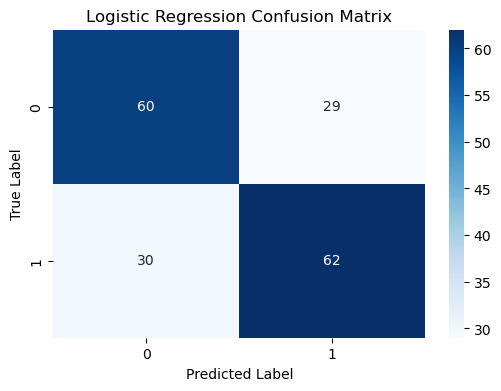

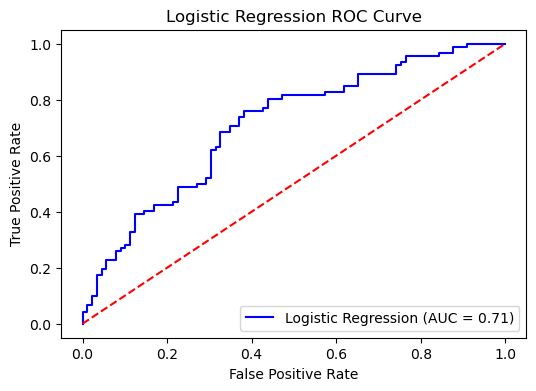

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_performance(y_test, y_pred, y_proba, model_name):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC
    auc = roc_auc_score(y_test, y_proba)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"--- {model_name} Performance Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f"{model_name} ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
# Assuming y_test and y_pred_* are the actual and predicted values, and y_proba_* are the probabilities
# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test[selected_features_lr])
y_proba_lr = lr_model.predict_proba(X_test[selected_features_lr])[:,1]
evaluate_model_performance(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")



--- Decision Tree Performance Metrics ---
Accuracy: 0.6298
Precision: 0.6263
Recall: 0.6739
F1-Score: 0.6492
ROC-AUC: 0.6291


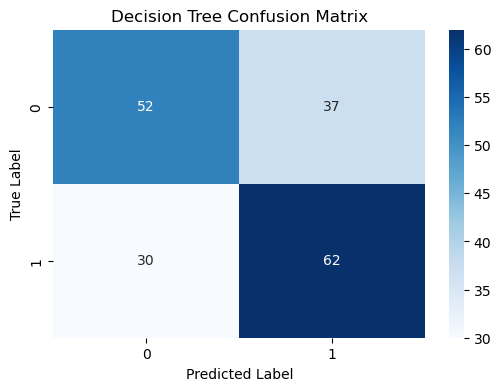

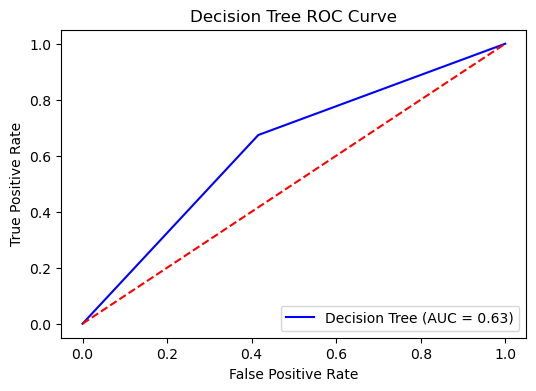

In [55]:

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test[selected_features_dt])
y_proba_dt = dt_model.predict_proba(X_test[selected_features_dt])[:,1]
evaluate_model_performance(y_test, y_pred_dt, y_proba_dt, "Decision Tree")

--- Random Forest Performance Metrics ---
Accuracy: 0.7293
Precision: 0.7529
Recall: 0.6957
F1-Score: 0.7232
ROC-AUC: 0.7766


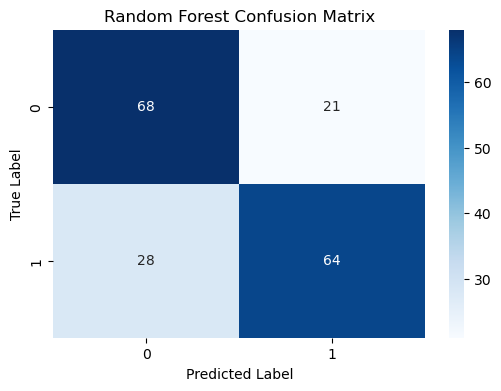

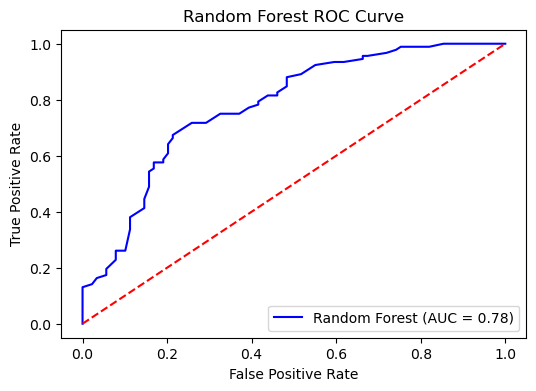

In [56]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test[selected_features_rf])
y_proba_rf = rf_model.predict_proba(X_test[selected_features_rf])[:,1]
evaluate_model_performance(y_test, y_pred_rf, y_proba_rf, "Random Forest")

--- SVM (Linear Kernel) Performance Metrics ---
Accuracy: 0.6851
Precision: 0.6882
Recall: 0.6957
F1-Score: 0.6919
ROC-AUC: 0.7248


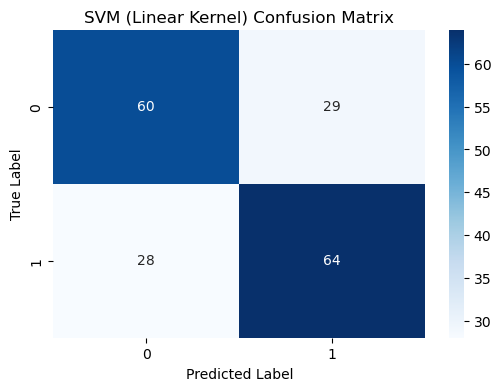

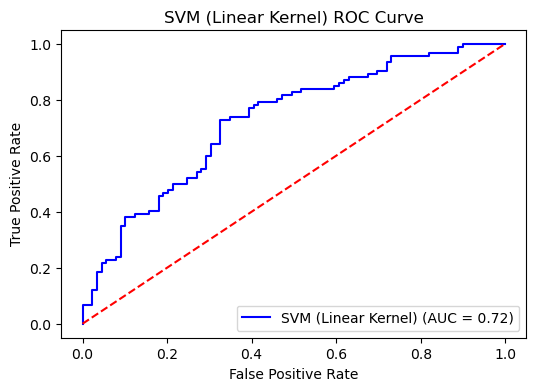

In [57]:
# Evaluate SVM (assuming you used a linear kernel and therefore have probability estimates)
y_pred_svm = svm_model.predict(X_test[selected_features_svm])
y_proba_svm = svm_model.decision_function(X_test[selected_features_svm])
evaluate_model_performance(y_test, y_pred_svm, y_proba_svm, "SVM (Linear Kernel)")


USING THE 10 SELECTED FEATURES BY RFE 

In [69]:
# List of variables to select
selected_variables = [
    'Age at Diagnosis', 
    'Cellularity', 
    'Cohort', 
    'Lymph nodes examined positive', 
    'Neoplasm Histologic Grade', 
    'Nottingham prognostic index', 
    'PR Status', 
    'Primary Tumor Laterality', 
    'Radio Therapy',
    'Overall Survival Status', 
    'TMB (nonsynonymous)'
]

# Select these variables from the bc_clean DataFrame
bc_clean_selected = bc_clean[selected_variables]

# Display the first few rows of the selected DataFrame to verify
print(bc_clean_selected.head())


   Age at Diagnosis  Cellularity  Cohort  Lymph nodes examined positive  \
1             43.19            0     1.0                            0.0   
2             48.87            0     1.0                            1.0   
3             47.68            1     1.0                            3.0   
4             76.97            0     1.0                            8.0   
5             78.77            1     1.0                            0.0   

   Neoplasm Histologic Grade  Nottingham prognostic index  PR Status  \
1                        3.0                        4.020          0   
2                        2.0                        4.030          0   
3                        2.0                        4.050          0   
4                        3.0                        6.080          0   
5                        3.0                        4.062          0   

   Primary Tumor Laterality  Radio Therapy Overall Survival Status  \
1                         0              1    

In [71]:
# Prepare the data
X = bc_clean_selected.drop(columns=['Overall Survival Status'])
y = bc_clean_selected['Overall Survival Status'].apply(lambda x: 1 if x == 'Deceased' else 0)

In [73]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [75]:
# Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

Original training set shape Counter({0: 451, 1: 349})
Original test set shape Counter({0: 113, 1: 87})
Resampled training set shape Counter({0: 451, 1: 451})


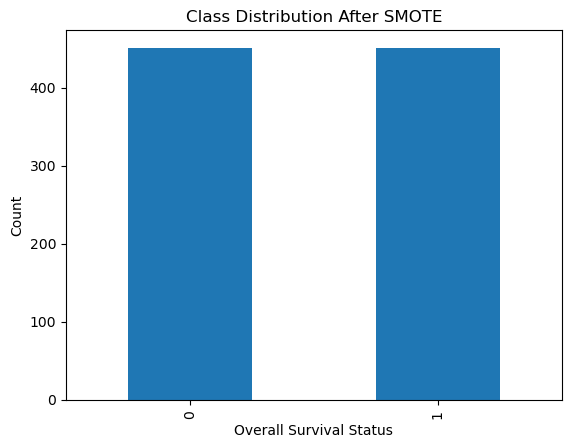

In [77]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'bc_clean' is your DataFrame
X = bc_clean_selected.drop(columns=['Overall Survival Status'])
y = bc_clean_selected['Overall Survival Status'].apply(lambda x: 1 if x == 'Deceased' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print original class distribution
print('Original training set shape', Counter(y_train))
print('Original test set shape', Counter(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE on the training data
print('Resampled training set shape', Counter(y_smote))

# At this point, you would train your model on X_train_smote, y_train_smote
# and evaluate it on X_test, y_test
# Plot the class distribution after SMOTE
class_counts_smote_oversampler = pd.Series(y_smote).value_counts()
class_counts_smote_oversampler.plot(kind='bar')
plt.xlabel("Overall Survival Status")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [79]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42, probability=True)
}

# Dictionary to store the performance metrics
metrics = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model on the SMOTE-balanced training data
    model.fit(X_smote, y_smote)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the metrics
    metrics[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

    # Print the metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("\n")

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


Model: Logistic Regression
Accuracy: 0.6850
ROC AUC: 0.7540
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       113
           1       0.63      0.67      0.65        87

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



Model: Decision Tree
Accuracy: 0.5900
ROC AUC: 0.5777
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       113
           1       0.53      0.48      0.51        87

    accuracy                           0.59       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.59      0.59      0.59       200



Model: Random Forest
Accuracy: 0.7150
ROC AUC: 0.7351
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       

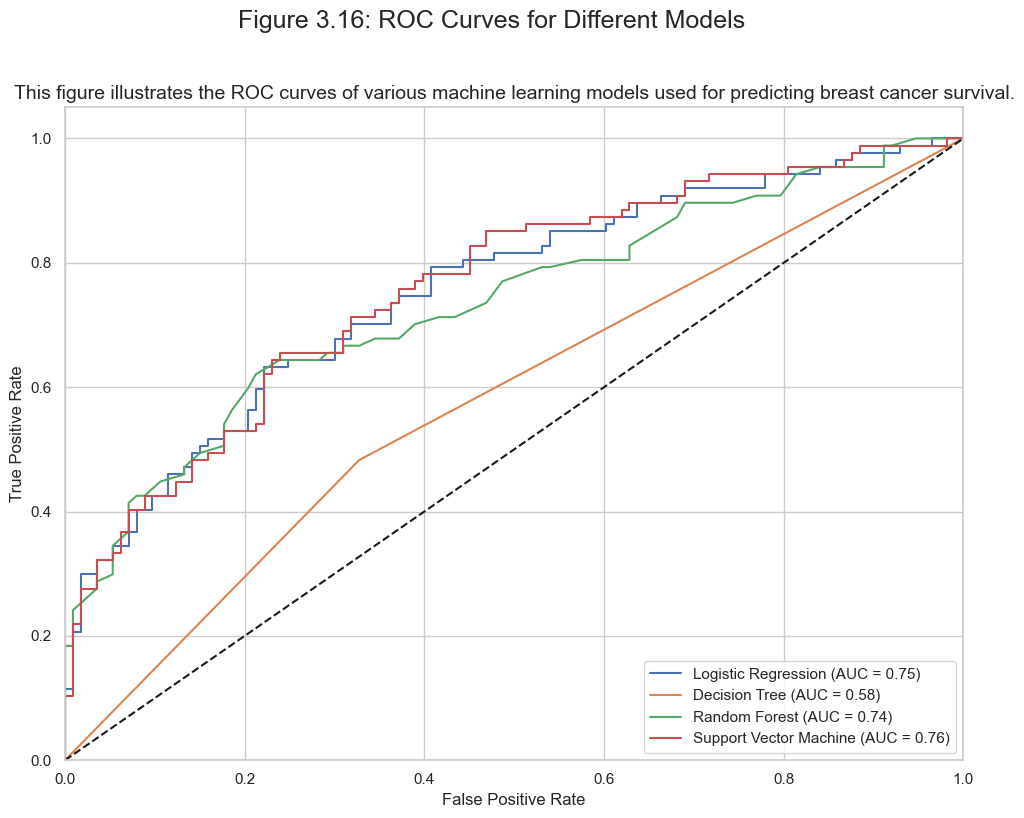

In [85]:

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add figure label and title
plt.suptitle('Figure 3.16: ROC Curves for Different Models', fontsize=18, y=1.02)
plt.title('This figure illustrates the ROC curves of various machine learning models used for predicting breast cancer survival.', fontsize=14)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()




<Figure size 1400x800 with 0 Axes>

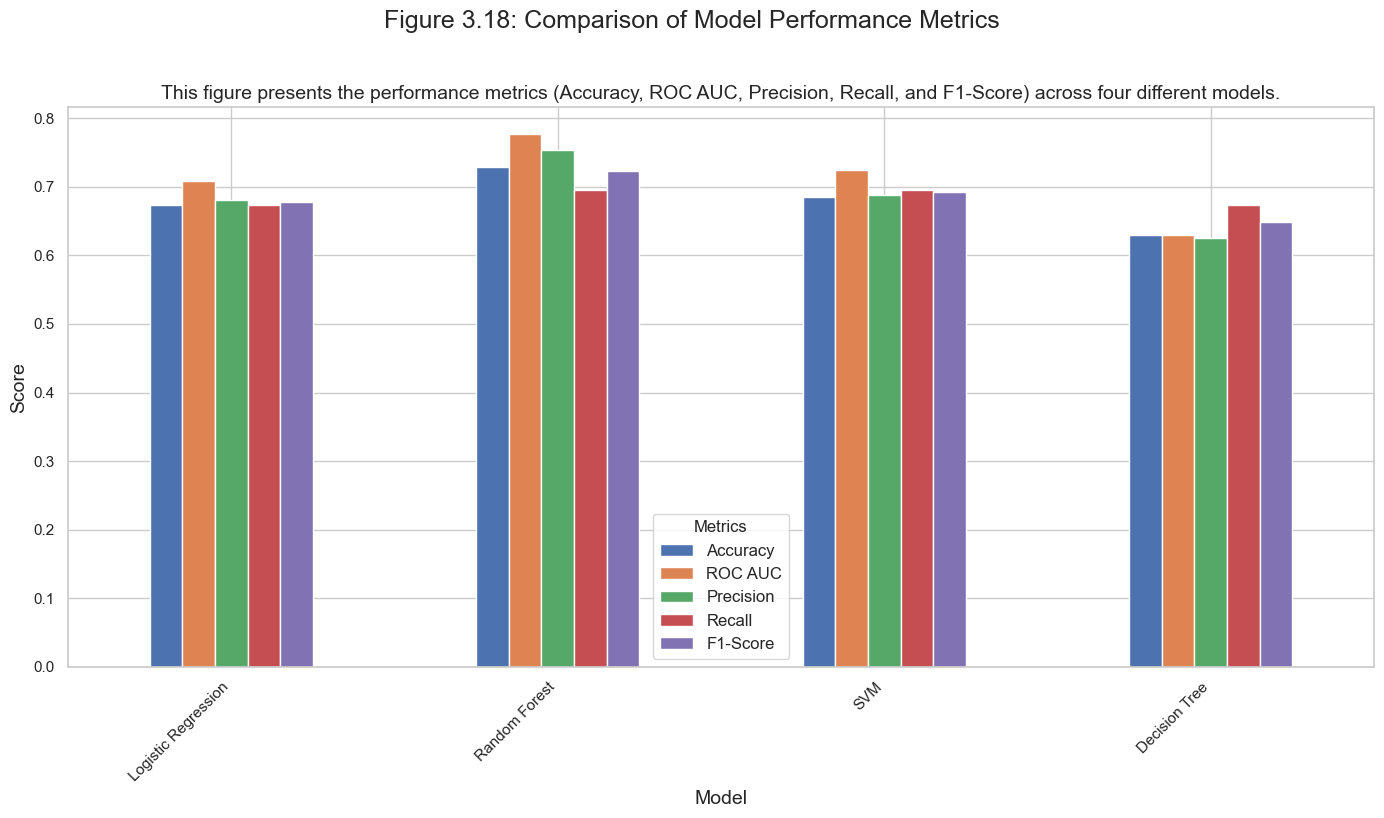

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the models
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'],
    'Accuracy': [0.674, 0.729, 0.685, 0.630],
    'ROC AUC': [0.709, 0.777, 0.725, 0.629],
    'Precision': [0.681, 0.753, 0.688, 0.626],
    'Recall': [0.674, 0.696, 0.696, 0.674],
    'F1-Score': [0.678, 0.723, 0.692, 0.649]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 8))
df.set_index('Model').plot(kind='bar', figsize=(14, 8))

# Add titles and labels
plt.suptitle('Figure 3.18: Comparison of Model Performance Metrics', fontsize=18, y=1.02)
plt.title('This figure presents the performance metrics (Accuracy, ROC AUC, Precision, Recall, and F1-Score) across four different models.', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Metrics', fontsize=12)

# Save the plot as a PNG file
plt.savefig("Figure_3.17_Comparison_of_Model_Performance.png", format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

